In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
df = pd.read_csv('../bodyPerformance.csv')

In [64]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


AttributeError: 'PathCollection' object has no property 'hue'

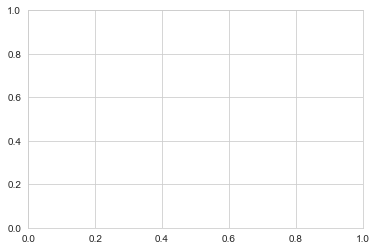

In [90]:
plt.scatter(df['age'],df['height_cm'],cmap='rainbow')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [66]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

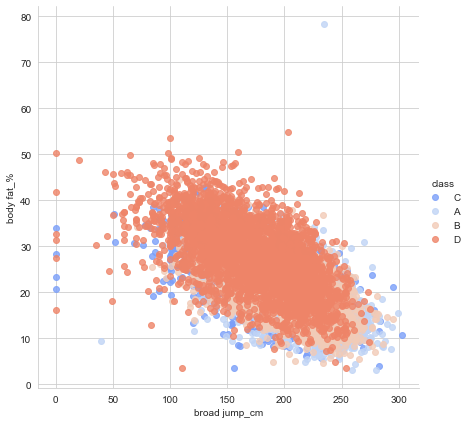

In [67]:
sns.set_style('whitegrid')
sns.lmplot('broad jump_cm','body fat_%',data=df, hue='class',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

In [68]:
df['gender'] = pd.get_dummies(data=df['gender'],drop_first=True)

In [69]:
df.eq(0).sum()

age                           0
gender                     4926
height_cm                     0
weight_kg                     0
body fat_%                    0
diastolic                     1
systolic                      1
gripForce                     3
sit and bend forward_cm      12
sit-ups counts              125
broad jump_cm                10
class                         0
dtype: int64

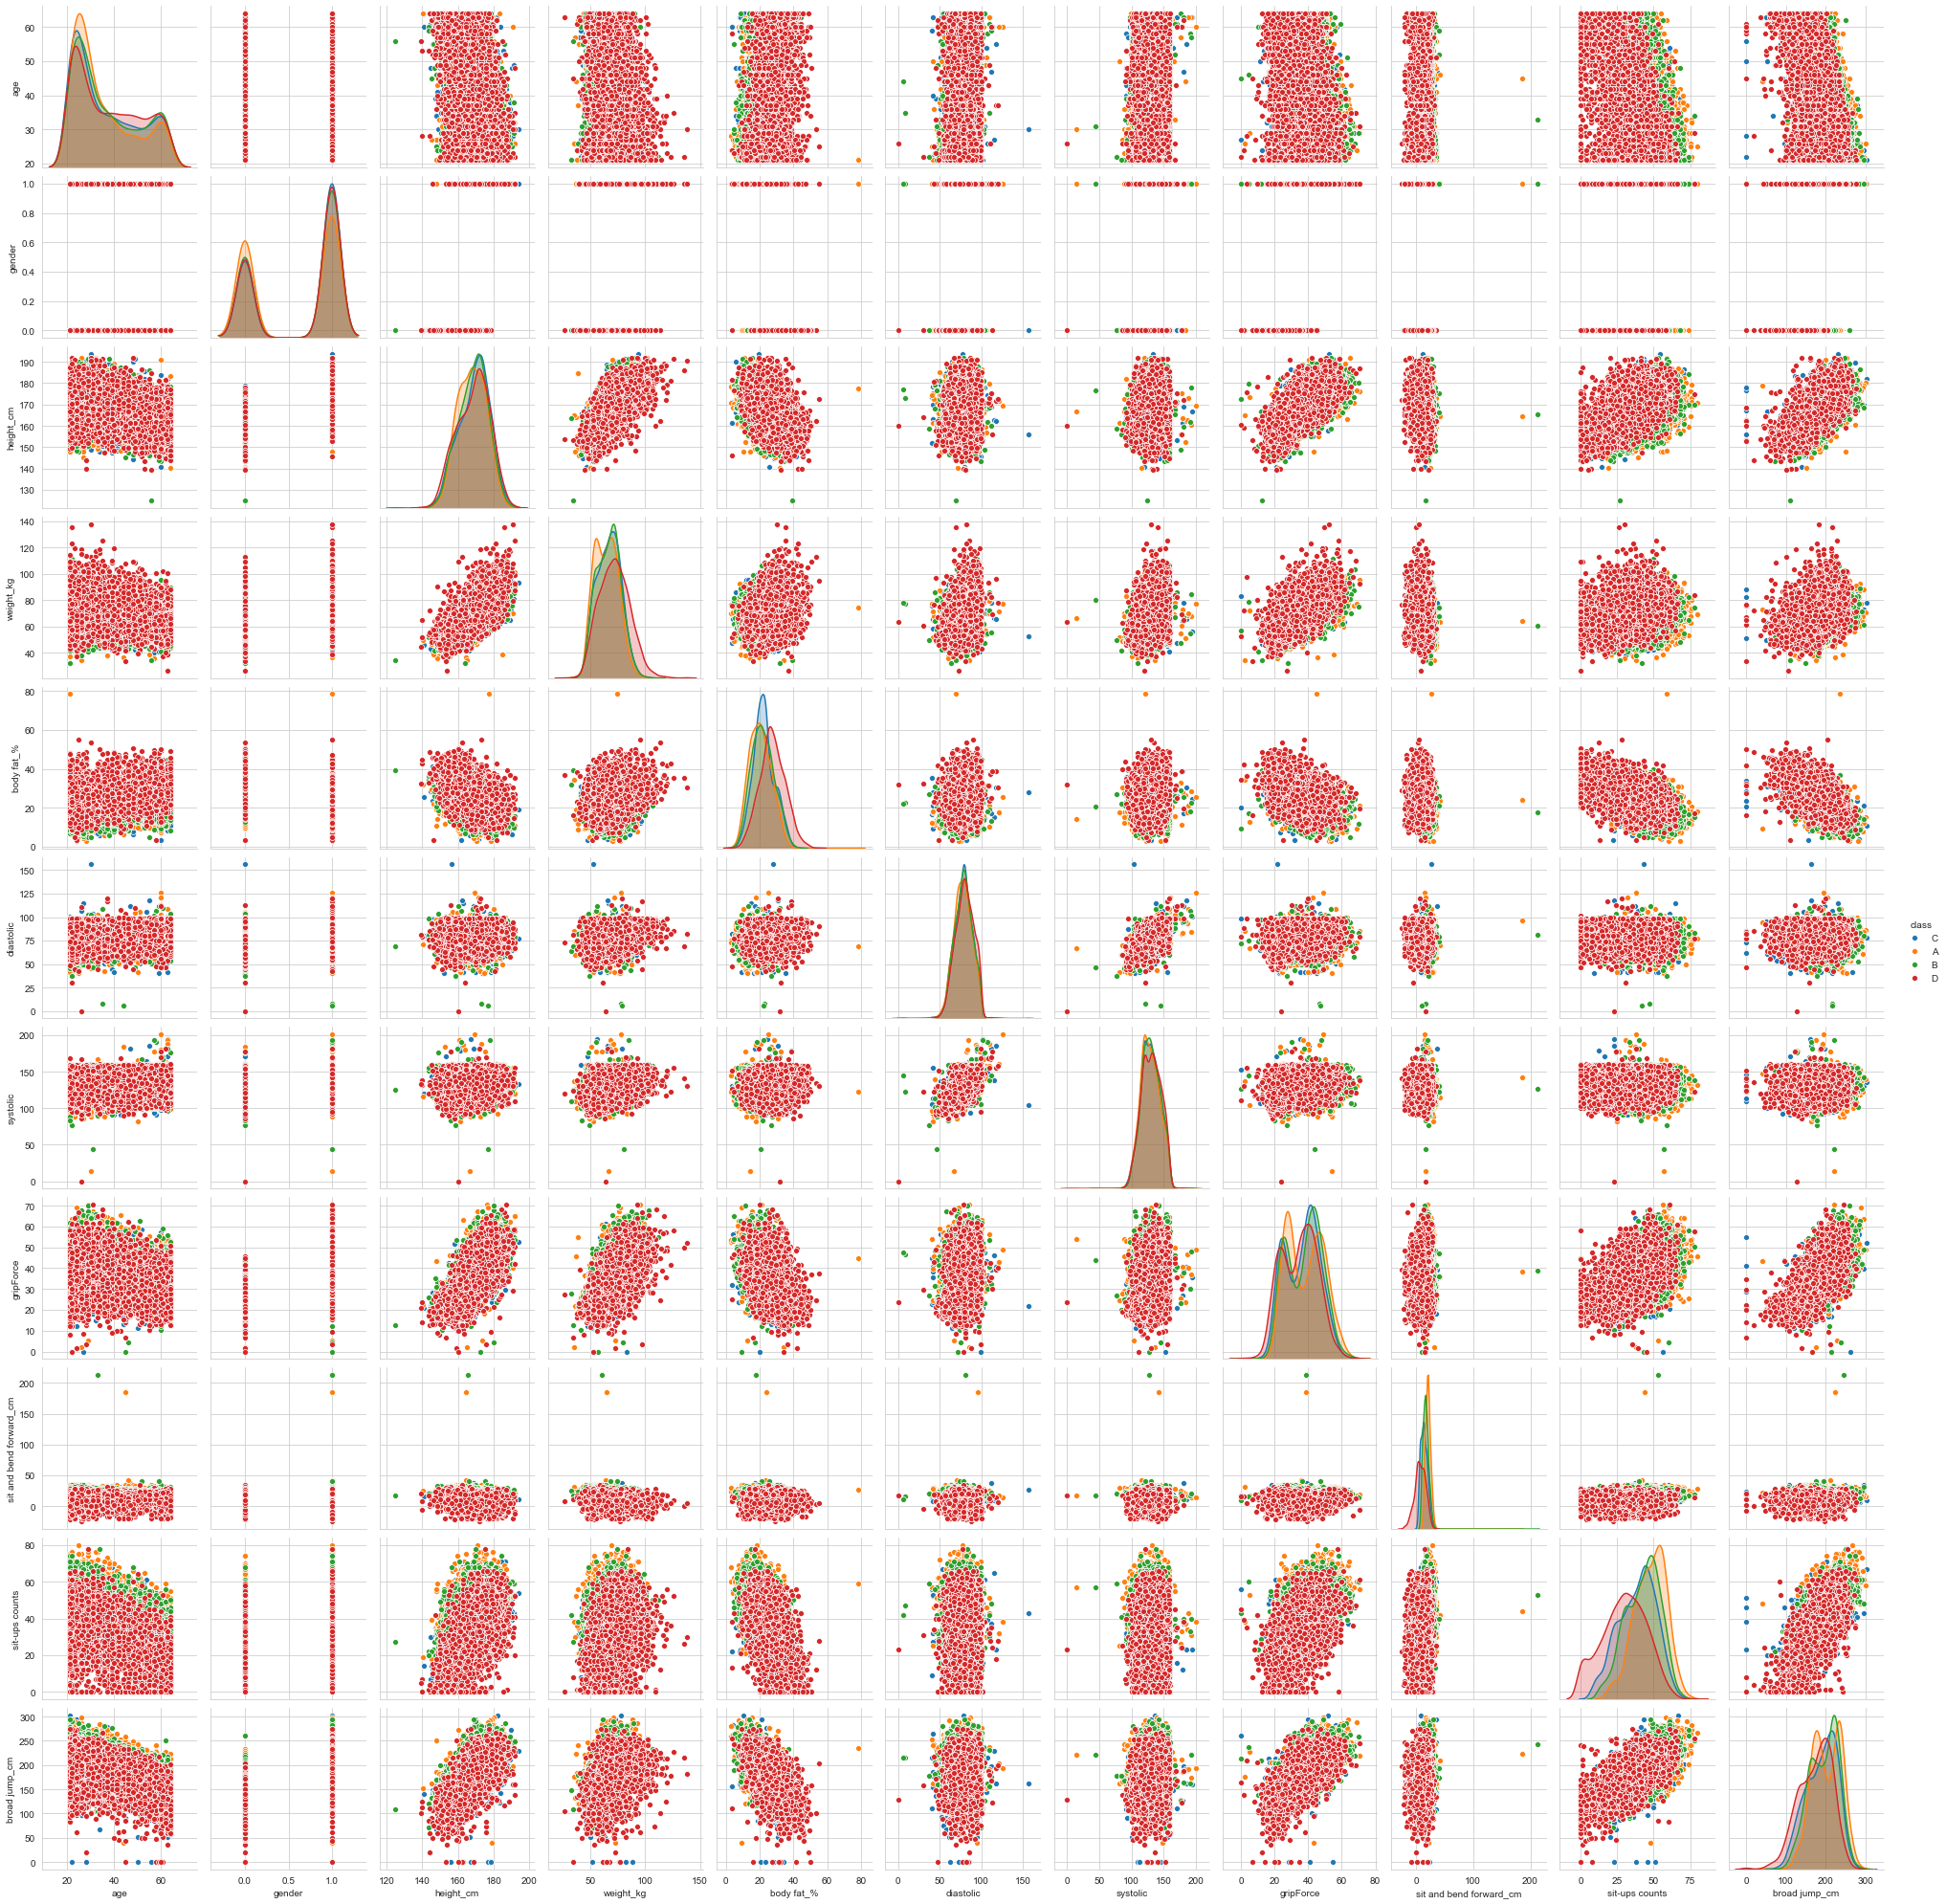

In [73]:
sns.pairplot(data=df, hue='class')

In [74]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop(['class'],axis=1))

In [ ]:
scaled_features = scaler.transform(df.drop(['class'],axis=1))

In [ ]:
df.columns

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=[['age', 'gender','height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']])
df_feat.head()

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['class'],test_size=0.30)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
pred = knn.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,pred))

[[665 236  89  21]
 [277 420 215  44]
 [106 324 464 112]
 [ 27 113 221 684]]


In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           A       0.62      0.66      0.64      1011
           B       0.38      0.44      0.41       956
           C       0.47      0.46      0.47      1006
           D       0.79      0.65      0.72      1045

    accuracy                           0.56      4018
   macro avg       0.57      0.55      0.56      4018
weighted avg       0.57      0.56      0.56      4018



In [26]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

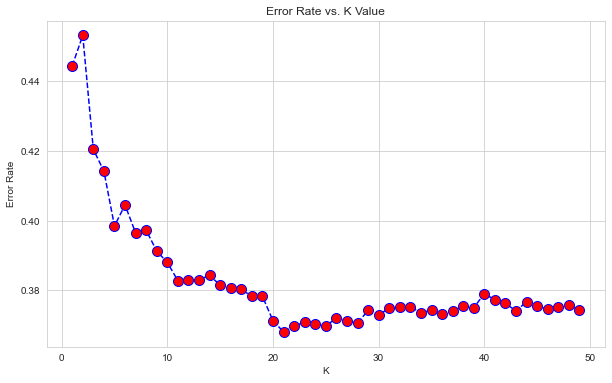

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
knn = KNeighborsClassifier(n_neighbors=35)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[831 169  10   1]
 [322 483 126  25]
 [125 315 539  27]
 [ 28  88 268 661]]


              precision    recall  f1-score   support

           A       0.64      0.82      0.72      1011
           B       0.46      0.51      0.48       956
           C       0.57      0.54      0.55      1006
           D       0.93      0.63      0.75      1045

    accuracy                           0.63      4018
   macro avg       0.65      0.62      0.63      4018
weighted avg       0.65      0.63      0.63      4018



In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC()

In [31]:
model.fit(X_train,y_train)

SVC()

In [32]:
predictions = model.predict(X_test)

In [33]:
print(confusion_matrix(y_test,predictions))

[[813 188   6   4]
 [223 556 151  26]
 [ 89 234 610  73]
 [ 13  71 171 790]]


In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           A       0.71      0.80      0.76      1011
           B       0.53      0.58      0.55       956
           C       0.65      0.61      0.63      1006
           D       0.88      0.76      0.82      1045

    accuracy                           0.69      4018
   macro avg       0.69      0.69      0.69      4018
weighted avg       0.70      0.69      0.69      4018



In [35]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [38]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.497, total=   4.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   4.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.495, total=   4.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.499, total=   4.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.501, total=   4.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.644, total=   2.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.653, total=   2.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.620, total=   2.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.642, total=   2.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.665, total=   2.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.677, total=   2.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.642, total=   2.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.667, total=   2.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.660, total=   2.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.631, total=   2.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.642, total=   2.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.664, total=   3.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.659, total=   3.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.635, total=   2.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.642, total=   2.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.606, total=   2.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.635, total=   2.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.629, total=   2.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 10.4min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [39]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [40]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [41]:
grid_predictions = grid.predict(X_test)

In [42]:
print(confusion_matrix(y_test,grid_predictions))

[[842 156   8   5]
 [216 573 139  28]
 [ 95 200 640  71]
 [ 14  60 151 820]]


In [43]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           A       0.72      0.83      0.77      1011
           B       0.58      0.60      0.59       956
           C       0.68      0.64      0.66      1006
           D       0.89      0.78      0.83      1045

    accuracy                           0.72      4018
   macro avg       0.72      0.71      0.71      4018
weighted avg       0.72      0.72      0.72      4018



In [103]:
X_test

AttributeError: 'numpy.ndarray' object has no attribute 'values'